In [23]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Skipping, found downloaded files in "./rice-type-classification" (use force=True to force download)


In [24]:
import pandas as pd
df=pd.read_csv("/content/rice-type-classification/riceClassification.csv")
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [25]:
df['Class'].value_counts()

,count
Class,
1,9985
0,8200


In [26]:
df.shape

(18185, 12)

In [27]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [58]:
#let' start by importing the libraies

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [29]:
print(torch.__version__)

2.9.0+cu126


In [30]:
#  let's now define the device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [31]:
df.head()


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [32]:
df.isnull().sum()

,0
id,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Perimeter,0
Roundness,0


In [33]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [34]:
df.drop(columns=['id'], inplace=True)
df.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0
18184,6134,153.081981,51.590606,0.941500,6283,88.374495,0.489975,338.613,0.672274,2.967245,0


In [35]:
df.shape

(18185, 11)

In [37]:
# let's normalize the data
df_original=df.copy()
for col in df.columns:
  df[col]=df[col]/df[col].abs().max()

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [38]:
df_original.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [44]:
x=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])

x.shape ,y.shape

((18185, 10), (18185,))

In [50]:
# splitting the data into training , validation and testing our model
x_train , x_test, y_train , y_test= train_test_split(x, y , test_size=.3, random_state=42)

In [51]:
x_test, x_val, y_test, y_val=train_test_split(x_test, y_test , test_size=.5, random_state=42)

In [52]:
x_train.shape, x_test.shape, x_val.shape

((12729, 10), (2728, 10), (2728, 10))

In [87]:
class dataset(Dataset):
  def __init__(self , x,y):
    self.x=torch.tensor(x, dtype=torch.float32).to(device)
    self.y=torch.tensor(y, dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.x)
  def __getitem__(self, index) :
    return self.x[index], self.y[index]

In [64]:
training_dataset=dataset(x_train, y_train)
testing_dataset=dataset(x_test, y_test)
val_dataset=dataset(x_val, y_val)
type(val_dataset[0])

tuple

In [65]:
# let's turn the data into mini batches
training_dataloader=DataLoader(training_dataset, shuffle=True, batch_size=8)
testing_dataloader=DataLoader(testing_dataset, shuffle=True, batch_size=8)
val_dataloader=DataLoader(val_dataset, shuffle=True, batch_size=8)

In [66]:
len(training_dataloader)

1592

In [67]:
12729/8

1591.125

In [105]:
for x, y in training_dataloader:
  print(x)
  print("____")
  print(y)
  break


tensor([[0.9167, 0.9383, 0.8454, 0.9453, 0.8685, 0.9574, 0.8923, 0.7981, 0.7893,
         0.6297],
        [0.8091, 0.8342, 0.8464, 0.9199, 0.7726, 0.8995, 0.8749, 0.7263, 0.8413,
         0.5592],
        [0.5524, 0.7748, 0.6245, 0.9637, 0.5239, 0.7432, 0.5569, 0.6377, 0.7449,
         0.7039],
        [0.6818, 0.8799, 0.6737, 0.9709, 0.6491, 0.8257, 0.9203, 0.7104, 0.7409,
         0.7410],
        [0.6052, 0.8337, 0.6369, 0.9712, 0.5765, 0.7779, 0.8767, 0.6760, 0.7263,
         0.7426],
        [0.6472, 0.8145, 0.6948, 0.9549, 0.6176, 0.8045, 0.7055, 0.6801, 0.7675,
         0.6651],
        [0.5839, 0.7867, 0.6498, 0.9601, 0.5580, 0.7642, 0.7062, 0.6428, 0.7750,
         0.6869],
        [0.4308, 0.6961, 0.5400, 0.9691, 0.4090, 0.6563, 0.5506, 0.5621, 0.7478,
         0.7314]], device='cuda:0')
____
tensor([0., 0., 1., 1., 1., 1., 1., 1.], device='cuda:0')


In [90]:
#let's build the model
class Mymodel(nn.Module):
  def __init__(self, hidden_layers=10):
    super().__init__()

    self.input_layer=nn.Linear(in_features=x.shape[1], out_features=hidden_layers)
    self.linear_layer=nn.Linear(in_features=hidden_layers , out_features=1)
    self.sigmoid=nn.Sigmoid()

  def forward (self,x):
    x=self.input_layer(x)
    x=self.linear_layer(x)
    x=self.sigmoid(x)
    return x

In [91]:
model=Mymodel().to(device)
summary(model, (x.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [93]:
# let's define a loss function and an optimizer
loss=nn.BCELoss()
optimizer=torch.optim.Adam(params=model.parameters(), lr=.1)

In [107]:
torch.manual_seed(42)
epochs=10

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
  print(f"Epoch: {epoch}\n--------")
  total_acc_train=0
  total_acc_val=0
  total_loss_train=0
  total_loss_val=0

  # Training loop
  model.train()
  for x, y in training_dataloader:
    # Do the forward pass
    y_pred=model(x).squeeze(1)
    #calculate the loss
    batch_loss=loss(y_pred,y)
    # calculate the accuracy
    acc=((y_pred.round()==y)).sum().item()
    total_acc_train+=acc
    total_loss_train+=batch_loss.item()
    # optimize zero grad
    optimizer.zero_grad()
    # loss backward
    batch_loss.backward()
    # optimize step
    optimizer.step()

  # Validation loop
  with torch.inference_mode():
    model.eval()
    for x,y in val_dataloader:
      y_pred=model(x).squeeze(1)
      batch_loss=loss(y_pred, y)
      total_loss_val+=batch_loss.item()
      acc=((y_pred.round()==y)).sum().item()
      total_acc_val+=acc

  # Calculate average metrics
  avg_train_loss = total_loss_train / len(training_dataloader)
  avg_train_acc = total_acc_train / len(training_dataset)
  avg_val_loss = total_loss_val / len(val_dataloader)
  avg_val_acc = total_acc_val / len(val_dataset)

  train_losses.append(avg_train_loss)
  train_accuracies.append(avg_train_acc)
  val_losses.append(avg_val_loss)
  val_accuracies.append(avg_val_acc)

  print(f"Train Loss: {avg_train_loss:.4f} | Train Acc: {avg_train_acc:.4f} ,Val Loss: {avg_val_loss:.4f} | Val Acc: {avg_val_acc:.4f}")

Epoch: 0
--------
Train Loss: 0.0952 | Train Acc: 0.9786 ,Val Loss: 0.0875 | Val Acc: 0.9791
Epoch: 1
--------
Train Loss: 0.0595 | Train Acc: 0.9837 ,Val Loss: 0.0477 | Val Acc: 0.9857
Epoch: 2
--------
Train Loss: 0.1128 | Train Acc: 0.9824 ,Val Loss: 0.0592 | Val Acc: 0.9861
Epoch: 3
--------
Train Loss: 0.2097 | Train Acc: 0.9797 ,Val Loss: 0.0986 | Val Acc: 0.9842
Epoch: 4
--------
Train Loss: 0.0710 | Train Acc: 0.9830 ,Val Loss: 0.0485 | Val Acc: 0.9857
Epoch: 5
--------
Train Loss: 0.0757 | Train Acc: 0.9809 ,Val Loss: 0.0452 | Val Acc: 0.9868
Epoch: 6
--------
Train Loss: 0.1065 | Train Acc: 0.9807 ,Val Loss: 0.0988 | Val Acc: 0.9861
Epoch: 7
--------
Train Loss: 0.1054 | Train Acc: 0.9834 ,Val Loss: 0.0438 | Val Acc: 0.9857
Epoch: 8
--------
Train Loss: 0.1193 | Train Acc: 0.9825 ,Val Loss: 0.0634 | Val Acc: 0.9776
Epoch: 9
--------
Train Loss: 0.1138 | Train Acc: 0.9785 ,Val Loss: 0.0503 | Val Acc: 0.9831


In [108]:
# Evaluate the model on the test set

model.eval()
with torch.inference_mode():
  total_test_loss = 0
  total_test_acc = 0
  for x_test_batch, y_test_batch in testing_dataloader:
    test_pred = model(x_test_batch).squeeze(1)
    batch_test_loss = loss(test_pred, y_test_batch)
    total_test_loss += batch_test_loss.item()
    total_test_acc += ((test_pred.round() == y_test_batch)).sum().item()

  avg_test_loss = total_test_loss / len(testing_dataloader)
  avg_test_acc = total_test_acc / len(testing_dataset)

print(f"\nTest Loss: {avg_test_loss:.4f} | Test Acc: {avg_test_acc:.4f}")


Test Loss: 0.0272 | Test Acc: 0.9897


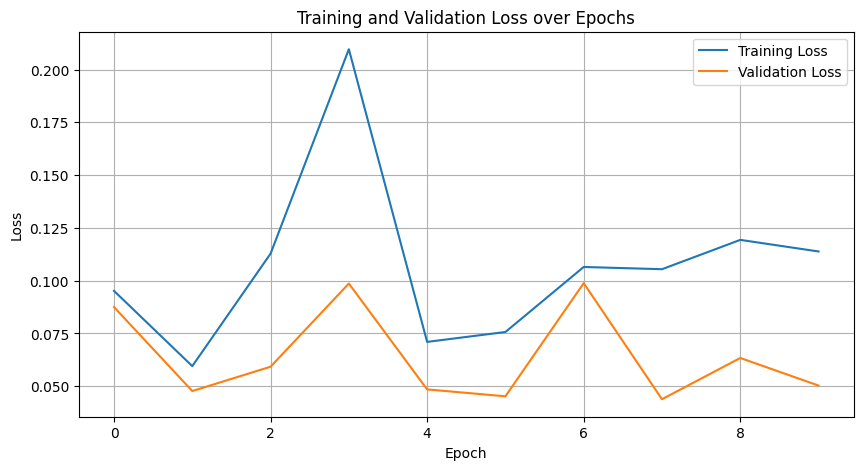

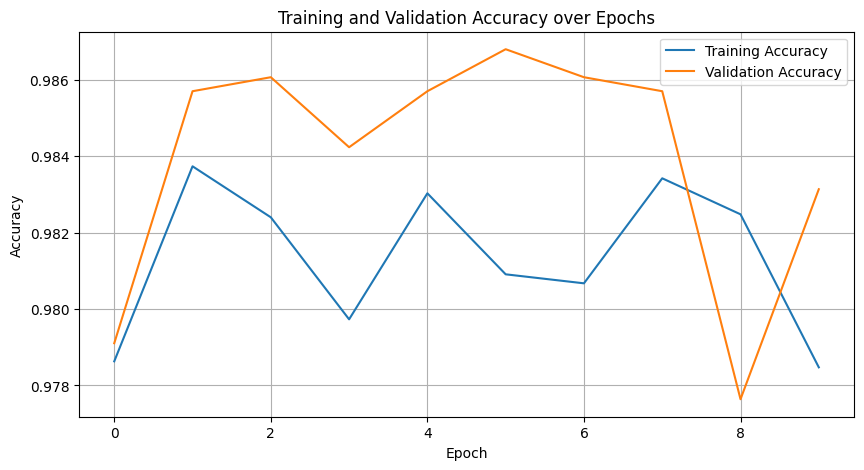

In [109]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()